In [1]:
!pip install kaggle


In [2]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sandeepyadavvvvv","key":"53e61580ae284756f9d68a466bb145f0"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d gti-upm/leapgestrecog


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 98% 2.09G/2.13G [00:25<00:01, 27.7MB/s]
100% 2.13G/2.13G [00:25<00:00, 89.7MB/s]


In [5]:
!unzip leapgestrecog.zip -d leap


Streaming output truncated to the last 5000 lines.
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leap/leapgestrecog/leapGestRecog/07/06_index/

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [8]:
data = []
labels = []
gestures = sorted(os.listdir("leap/leapgestrecog/leapGestRecog/00"))  # get gesture categories

for person in os.listdir("leap/leapgestrecog/leapGestRecog"): # Corrected path for person directory
    person_path = os.path.join("leap/leapgestrecog/leapGestRecog", person)
    if os.path.isdir(person_path): # Ensure it's a directory before iterating
        for gesture in gestures:
            gesture_path = os.path.join(person_path, gesture)
            if os.path.isdir(gesture_path): # Ensure it's a directory before iterating
                for img_name in os.listdir(gesture_path):
                    img = cv2.imread(os.path.join(gesture_path, img_name), cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (120, 120))
                    data.append(img)
                    labels.append(gestures.index(gesture))

data = np.array(data).reshape(-1, 120, 120, 1) / 255.0
labels = to_categorical(labels)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42, shuffle=True
)


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(120,120,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(gestures), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,769,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,862,986 (10.92 MB)

 Trainable params: 2,862,986 (10.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=3,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/3
400/400 ━━━━━━━━━━━━━━━━━━━━ 365s 909ms/step - accuracy: 0.6773 - loss: 0.9470 - val_accuracy: 0.9975 - val_loss: 0.0086
Epoch 2/3
400/400 ━━━━━━━━━━━━━━━━━━━━ 353s 837ms/step - accuracy: 0.9804 - loss: 0.0583 - val_accuracy: 0.9978 - val_loss: 0.0055
Epoch 3/3
400/400 ━━━━━━━━━━━━━━━━━━━━ 338s 844ms/step - accuracy: 0.9856 - loss: 0.0403 - val_accuracy: 0.9987 - val_loss: 0.0028


In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


125/125 ━━━━━━━━━━━━━━━━━━━━ 27s 215ms/step - accuracy: 0.9999 - loss: 2.8862e-04
Test Accuracy: 0.999750018119812


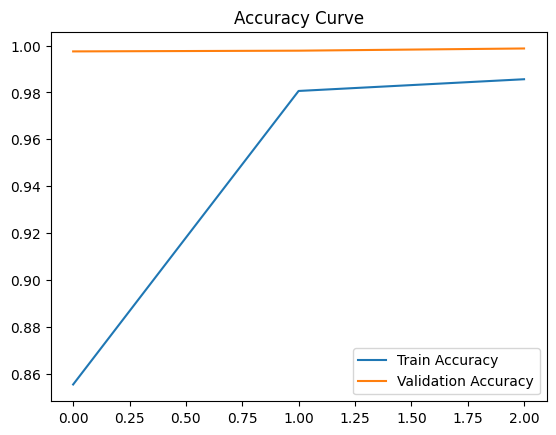

In [13]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")
plt.show()


In [14]:
test_img = X_test[0].reshape(1,120,120,1)
prediction = np.argmax(model.predict(test_img))
print("Predicted Gesture:", gestures[prediction])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted Gesture: 04_fist_moved


In [15]:
test_img = X_test[0].reshape(1,120,120,1)
prediction = np.argmax(model.predict(test_img))
print("Predicted Gesture:", gestures[prediction])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Gesture: 04_fist_moved
